In [219]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 


In [ ]:
diabetes_df = pd.read_csv ("C:\\MULTIPLEDISEASEPREDICTION\\data\\diabetes.csv")


In [221]:
diabetes_df.head()
diabetes_df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [222]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [223]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [224]:
diabetes_df.shape

(100000, 9)

In [225]:
diabetes_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [226]:
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [227]:
diabetes_df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [228]:
diabetes_df['gender']= diabetes_df['gender'].replace({'Other':'Female'})

In [229]:
diabetes_df[diabetes_df['gender']=='Other']
diabetes_df['gender'].value_counts()

diabetes_df['gender'] = diabetes_df['gender'].map({'Male': 0, 'Female': 1}).astype(int)


In [230]:
diabetes_df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [231]:
diabetes_df['smoking_history'] = diabetes_df['smoking_history'].replace({
    'current': 'current',
    'former': 'past',
    'not current': 'past',
    'ever': 'past',
    'never': 'never',
    'No Info': 'unknown'
})


In [232]:
diabetes_df['smoking_history'].value_counts()


smoking_history
unknown    35816
never      35095
past       19803
current     9286
Name: count, dtype: int64

In [233]:
diabetes_df['heart_disease'].value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

In [234]:
diabetes_df['hypertension'].value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

In [235]:
diabetes_df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [236]:
diabetes_df.duplicated().sum()

np.int64(4036)

In [237]:
diabetes_df[diabetes_df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,0,80.0,0,0,unknown,27.32,6.6,159,0
3272,1,80.0,0,0,unknown,27.32,3.5,80,0
3418,1,19.0,0,0,unknown,27.32,6.5,100,0
3939,1,78.0,1,0,past,27.32,3.5,130,0
3960,0,47.0,0,0,unknown,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,1,52.0,0,0,never,27.32,6.1,145,0
99985,0,25.0,0,0,unknown,27.32,5.8,145,0
99989,1,26.0,0,0,unknown,27.32,5.0,158,0
99990,0,39.0,0,0,unknown,27.32,6.1,100,0


In [238]:
diabetes_df = diabetes_df.drop_duplicates()

In [239]:
print(type(diabetes_df))
diabetes_df.shape


<class 'pandas.core.frame.DataFrame'>


(95964, 9)

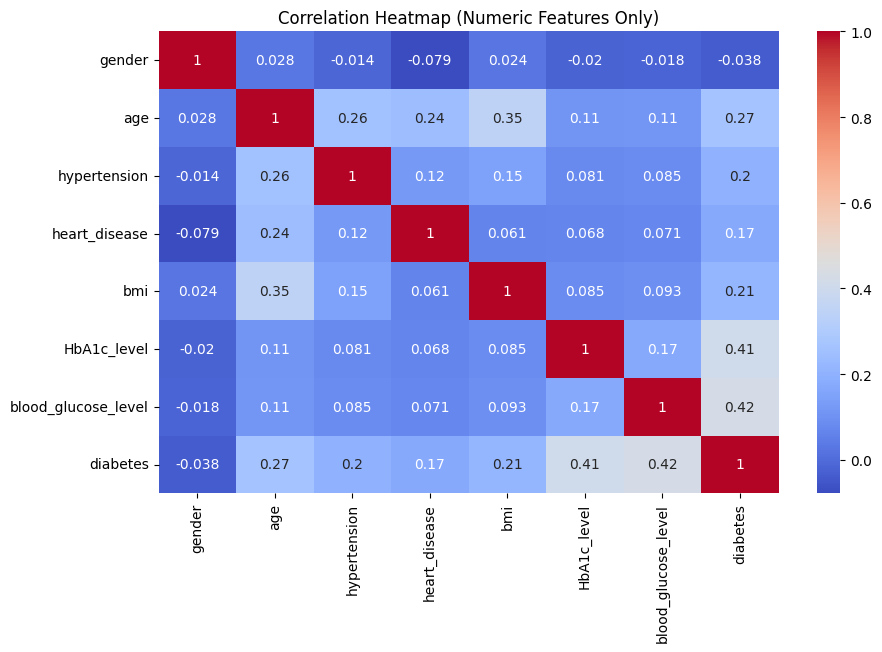

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = diabetes_df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [241]:
# Subset of features you want to visualize


In [242]:
# Check correlation between features
correlation_matrix = numeric_df.corr()

# See just the correlation between HbA1c and Glucose
print("Correlation:", correlation_matrix['HbA1c_level']['blood_glucose_level'])


Correlation: 0.17182752728552028


In [243]:
correlation_matrix = numeric_df.corr()
correlation_matrix 

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.028486,-0.014174,-0.078541,0.023509,-0.019957,-0.017930,-0.037769
age,0.028486,1.000000,0.257738,0.238799,0.345159,0.107174,0.114563,0.265496
hypertension,-0.014174,0.257738,1.000000,0.119989,0.148150,0.081494,0.084915,0.195666
heart_disease,-0.078541,0.238799,0.119989,1.000000,0.061393,0.068201,0.070935,0.170703
bmi,0.023509,0.345159,0.148150,0.061393,1.000000,0.084502,0.092609,0.214963
HbA1c_level,-0.019957,0.107174,0.081494,0.068201,0.084502,1.000000,0.171828,0.406590
blood_glucose_level,-0.017930,0.114563,0.084915,0.070935,0.092609,0.171828,1.000000,0.424541
diabetes,-0.037769,0.265496,0.195666,0.170703,0.214963,0.406590,0.424541,1.000000


In [244]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,unknown,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0


In [245]:
diabetes_df[diabetes_df['bmi']==1]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


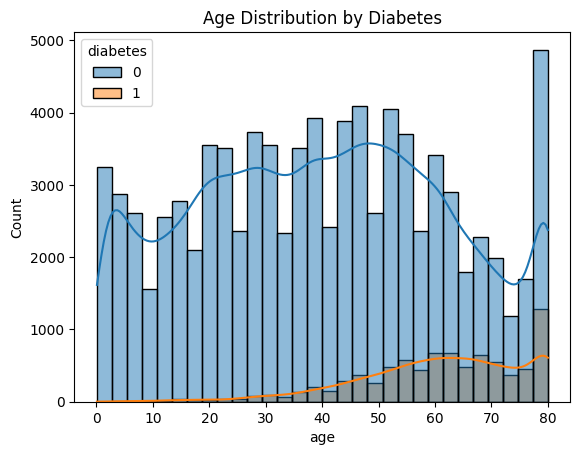

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=diabetes_df, x='age', hue='diabetes', kde=True, bins=30)
plt.title("Age Distribution by Diabetes")
plt.show()


In [247]:
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,unknown,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,1,36.0,0,0,unknown,24.60,4.8,145,0
99996,1,2.0,0,0,unknown,17.37,6.5,100,0
99997,0,66.0,0,0,past,27.83,5.7,155,0
99998,1,24.0,0,0,never,35.42,4.0,100,0


In [248]:
diabetes_df['bmi'] = diabetes_df['bmi'].clip(10, 50)
diabetes_df['blood_glucose_level'] = diabetes_df['blood_glucose_level'].clip(70, 250)
diabetes_df['HbA1c_level'] = diabetes_df['HbA1c_level'].clip(3.5, 9)


In [249]:
diabetes_df[['bmi', 'blood_glucose_level', 'HbA1c_level']].describe()


,bmi,blood_glucose_level,HbA1c_level
count,95964.000000,95964.000000,95964.000000
mean,27.276431,137.579759,5.533095
std,6.580158,38.798364,1.073240
min,10.010000,80.000000,3.500000
25%,23.390000,100.000000,4.800000
50%,27.320000,140.000000,5.800000
75%,29.870000,159.000000,6.200000
max,50.000000,250.000000,9.000000


In [250]:
features_to_check = ['bmi', 'blood_glucose_level', 'HbA1c_level']

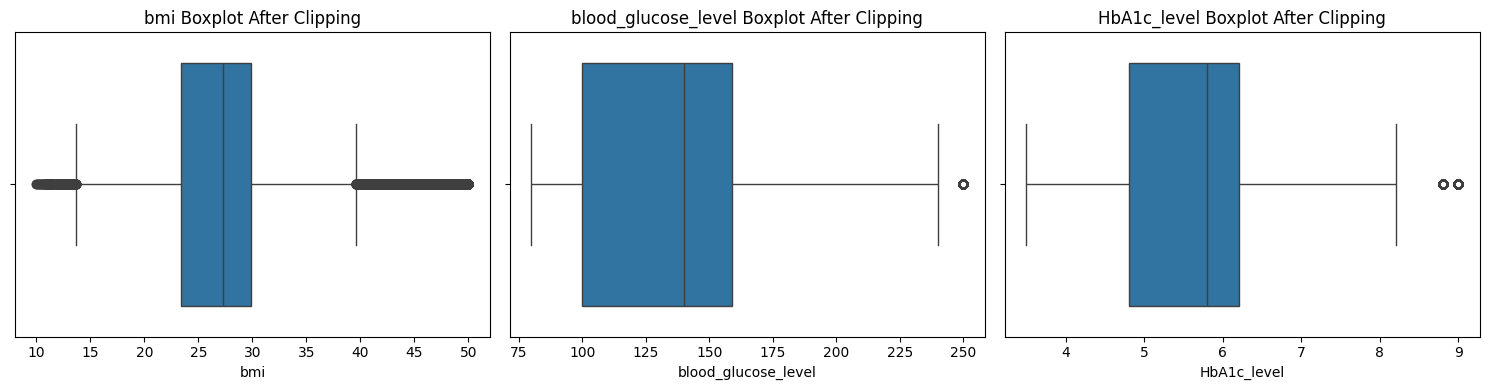

In [251]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(features_to_check):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=diabetes_df[col])
    plt.title(f"{col} Boxplot After Clipping")
plt.tight_layout()
plt.show()


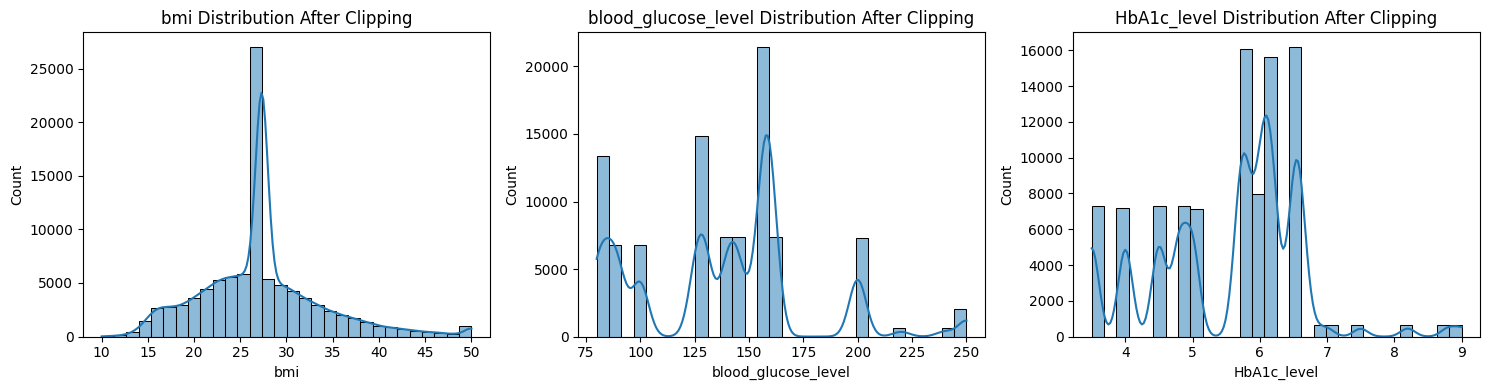

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_check = ['bmi', 'blood_glucose_level', 'HbA1c_level']

plt.figure(figsize=(15, 4))
for i, col in enumerate(features_to_check):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=diabetes_df, x=col, kde=True, bins=30)
    plt.title(f"{col} Distribution After Clipping")
plt.tight_layout()
plt.show()


In [253]:
diabetes_df['age_group'] = pd.cut(diabetes_df['age'], bins=[0,18,40,60,100], labels=['child','young','adult','senior'])
diabetes_df['age_group'] = diabetes_df['age_group'].astype(str)


In [254]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,1,80.0,0,1,never,25.19,6.6,140,0,senior
1,1,54.0,0,0,unknown,27.32,6.6,80,0,adult
2,0,28.0,0,0,never,27.32,5.7,158,0,young
3,1,36.0,0,0,current,23.45,5.0,155,0,young
4,0,76.0,1,1,current,20.14,4.8,155,0,senior


In [255]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95964 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               95964 non-null  int64  
 1   age                  95964 non-null  float64
 2   hypertension         95964 non-null  int64  
 3   heart_disease        95964 non-null  int64  
 4   smoking_history      95964 non-null  object 
 5   bmi                  95964 non-null  float64
 6   HbA1c_level          95964 non-null  float64
 7   blood_glucose_level  95964 non-null  int64  
 8   diabetes             95964 non-null  int64  
 9   age_group            95964 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 8.1+ MB


In [256]:
diabetes_df['glucose_hba1c'] = diabetes_df['blood_glucose_level'] * diabetes_df['HbA1c_level']


In [257]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,glucose_hba1c
0,1,80.0,0,1,never,25.19,6.6,140,0,senior,924.0
1,1,54.0,0,0,unknown,27.32,6.6,80,0,adult,528.0
2,0,28.0,0,0,never,27.32,5.7,158,0,young,900.6
3,1,36.0,0,0,current,23.45,5.0,155,0,young,775.0
4,0,76.0,1,1,current,20.14,4.8,155,0,senior,744.0


In [258]:
diabetes_df.shape

(95964, 11)

In [259]:

import os
os.makedirs('data', exist_ok=True)
diabetes_df.to_csv('data/cleaned_diabetes_data.csv', index=False)


In [260]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Sex
M    725
F    193
Name: count, dtype: int64

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [265]:
heart_df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [266]:
heart_df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [267]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [268]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [269]:
for col in ['RestingBP', 'Cholesterol']:
    heart_df[col] = heart_df[col].replace(0, np.nan)
    heart_df[col] = heart_df[col].fillna(heart_df[col].median())
 

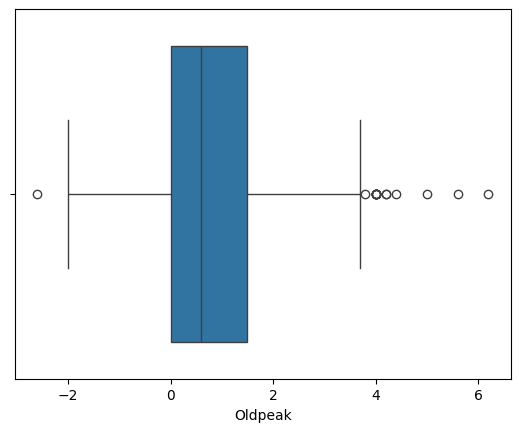

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = heart_df['Oldpeak'])
plt.show()


In [271]:
heart_df.shape

(918, 12)

In [272]:
heart_df.shape


(918, 12)

In [273]:
Q1 = heart_df['Cholesterol'].quantile(0.25)
Q3 = heart_df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

upper_limit
lower_limit


np.float64(134.5)

In [274]:
heart_df['Cholesterol'] = heart_df['Cholesterol'].clip(lower=134, upper=350)


In [275]:
heart_df['cholesterol_outlier'] = ((heart_df['Cholesterol'] < 134) | (heart_df['Cholesterol'] > 350)).astype(int)


In [276]:
heart_df.shape

(918, 13)

In [277]:
Q1 = heart_df['Oldpeak'].quantile(0.25)
Q3 = heart_df['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

upper_limit
lower_limit

np.float64(-2.25)

In [278]:
heart_df[heart_df['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,cholesterol_outlier
321,63,M,ASY,100.0,237.0,1,Normal,109,N,-0.9,Flat,1,0
324,46,M,ASY,100.0,237.0,1,ST,133,N,-2.6,Flat,1,0
325,42,M,ASY,105.0,237.0,1,Normal,128,Y,-1.5,Down,1,0
326,45,M,NAP,110.0,237.0,0,Normal,138,N,-0.1,Up,0,0
331,56,M,ASY,115.0,237.0,1,ST,82,N,-1.0,Up,1,0
332,38,M,NAP,100.0,237.0,0,Normal,179,N,-1.1,Up,0,0
334,51,M,ASY,130.0,237.0,1,Normal,170,N,-0.7,Up,1,0
335,62,M,TA,120.0,237.0,1,LVH,134,N,-0.8,Flat,1,0
352,56,M,ASY,120.0,237.0,0,ST,100,Y,-1.0,Down,1,0
407,62,M,ASY,115.0,237.0,1,Normal,72,Y,-0.5,Flat,1,0


In [279]:
type(heart_df)

pandas.core.frame.DataFrame

In [280]:
heart_df['Oldpeak'] = heart_df['Oldpeak'].clip(lower=0)


In [281]:
heart_df[heart_df['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,cholesterol_outlier


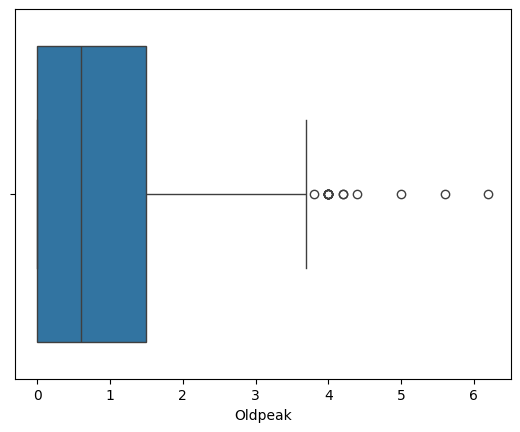

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = heart_df['Oldpeak'])
plt.show()